In [13]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

In [14]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3

In [15]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2, and v3 devices. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage
    d.v2_readout = devices.v2.voltage
    d.v3_readout = devices.v3.voltage

    d.vsum = d.v1_readout + d.v2_readout + d.v3_readout
    
    return d

In [16]:
@ps.live_plot
def custom_live_plot(expt):
    plt.plot(expt.v1_voltage, expt.v1_readout/2)
    plt.plot(expt.v1_voltage, expt.v1_readout)

    plt.xlabel('Custom x label')
    plt.ylabel('custom y label')
    
    plt.title('Custom Title')
    

In [17]:
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.001)
runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices, time=True)
expt.start_thread()


<function get_voltage_data at 0x12ddc6e80>


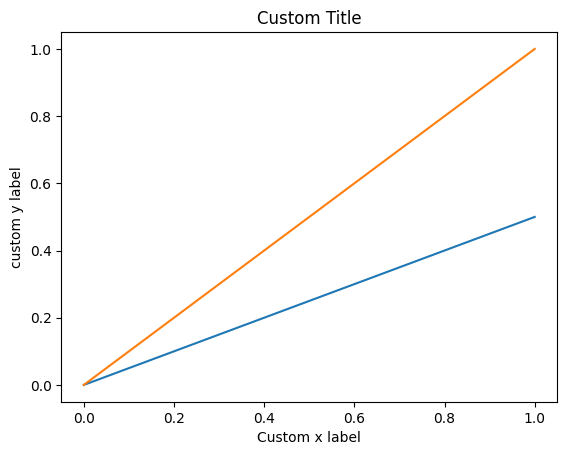

In [18]:
try:
    custom_live_plot(expt)
except KeyboardInterrupt:
    expt.stop()
